# Siamese Model

## Upload the Data

### Import supporting libraries

In [1]:
import LoadData
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

### Connecting to the Database

In [2]:
DBLoc = "./data/benchmark.db"
conn = LoadData.connectToDB(DBLoc)

Connecting to ./data/benchmark.db .....
Connected to ./data/benchmark.db


### Open the Dataset and Dataloader

In [3]:
data = LoadData.LoadAllEncodings(conn)
data['Encoding1'] = data['Encoding1'].apply(LoadData.deserialize_encoding)
data['Encoding2'] = data['Encoding2'].apply(LoadData.deserialize_encoding)
data.head(10)

,Encoding1,Encoding2,AlignmentScore
0,"[5.889621, 1.421312, -1.784085, 8.756901, -2.4...","[2.057203, -0.320799, -1.235001, 2.8408, -0.77...",0.0
1,"[5.889621, 1.421312, -1.784085, 8.756901, -2.4...","[0.219529, 1.371923, -0.711086, 2.675397, -0.4...",0.0
2,"[5.889621, 1.421312, -1.784085, 8.756901, -2.4...","[-0.13575, -0.002365, 0.059046, 0.083796, 0.06...",0.0
3,"[5.889621, 1.421312, -1.784085, 8.756901, -2.4...","[1.703211, 1.607478, -1.28063, 2.984896, -1.82...",0.0
4,"[5.889621, 1.421312, -1.784085, 8.756901, -2.4...","[1.622336, 1.383203, -1.722515, 2.852858, -1.1...",0.0
5,"[5.889621, 1.421312, -1.784085, 8.756901, -2.4...","[0.565803, 1.289719, -0.778099, 0.875891, -0.8...",0.0
6,"[5.889621, 1.421312, -1.784085, 8.756901, -2.4...","[8.166027, -3.384297, -4.185069, 17.54004, -6....",0.0
7,"[5.889621, 1.421312, -1.784085, 8.756901, -2.4...","[1.068295, -0.242165, -0.632848, 1.914043, -0....",0.0
8,"[5.889621, 1.421312, -1.784085, 8.756901, -2.4...","[0.989081, 0.353823, -0.876116, 1.762983, -0.8...",0.0
9,"[5.889621, 1.421312, -1.784085, 8.756901, -2.4...","[1.861915, -0.115179, -0.672746, 4.931495, -1....",0.0


In [4]:
df_zero = data[(data['AlignmentScore'] == 0)]
df_one = data[(data['AlignmentScore'] == 1)]
df_non_zero = data[(data['AlignmentScore'] != 0) & (data['AlignmentScore'] != 1)]

print(f"Number of zero scores: {df_zero.shape[0]}")
print(f"Number of one scores: {df_one.shape[0]}")
print(f"Number of non-zero scores: {df_non_zero.shape[0]}")
print(f"Total number of scores: {df_zero.shape[0] + df_one.shape[0] + df_non_zero.shape[0]}")
print(f"Actual number of scores: {data.shape[0]}")

Number of zero scores: 203833
Number of one scores: 331
Number of non-zero scores: 13924
Total number of scores: 218088
Actual number of scores: 218088


### Split Data into Training, Validation and Testing Dataset
Given than we want to predict the functions with the largest alignment scores to merge, we should split it according to functions, so we can try to predict the function it is supposed to align with

In [5]:
# Evenly split the dataset so that there is an even amount of zeroes, ones and float alignment score
testing_percentage = 0.2
training_zero, testing_zero = train_test_split(df_zero, test_size=testing_percentage, random_state=42)
training_one, testing_one = train_test_split(df_one, test_size=testing_percentage, random_state=42)
training_non_zero, testing_non_zero = train_test_split(df_non_zero, test_size=testing_percentage, random_state=42)

# Split the training set into training and validation set
validation_percentage = 0.25
training_zero, validation_zero = train_test_split(training_zero, test_size=validation_percentage, random_state=42)
training_one, validation_one = train_test_split(training_one, test_size=validation_percentage, random_state=42)
training_non_zero, validation_non_zero = train_test_split(training_non_zero, test_size=validation_percentage, random_state=42)

# Ratio of zeroes to non-zero data
zero_ratio = training_zero.shape[0] / (training_non_zero.shape[0] + training_zero.shape[0] + training_one.shape[0])
print(f"Zero ratio: {zero_ratio}")
print(f"Non-zero ratio: {1 - zero_ratio}")

Zero ratio: 0.9346432201511643
Non-zero ratio: 0.0653567798488357


In [6]:
training_set = pd.concat([training_zero, training_one, training_non_zero])
validation_set = pd.concat([validation_zero, validation_one, validation_non_zero])
testing_set = pd.concat([testing_zero, testing_one, testing_non_zero])
print(f"Training Set Shape: {training_set.shape}")
print(f"Validation Set Shape: {validation_set.shape}")
print(f"Testing Set Shape: {testing_set.shape}")

# Set the sample weights for the training set
sample_weights = np.where(training_set['AlignmentScore'] == 0, 1 - zero_ratio, zero_ratio)

Training Set Shape: (130851, 3)
Validation Set Shape: (43618, 3)
Testing Set Shape: (43619, 3)


## Siamese Model

### PyTorch

In [7]:
import torch
from torch.utils.data import DataLoader

In [8]:
if torch.cuda.is_available():
    print(f"Using GPU: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("GPU is not available, using CPU")

Using GPU: NVIDIA GeForce RTX 3050 Ti Laptop GPU


#### Load Training Data into DataLoader

In [10]:
training_dataset = LoadData.EncodingDataset(training_set)
training_dataloader = DataLoader(training_dataset)

#### Train Model

In [ ]:
for batch in training_dataloader:
    pass

### Tensorflow

In [7]:
import tensorflow as tf
import numpy as np

2025-02-11 15:23:49.870950: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-11 15:23:49.879436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739287429.887983   35962 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739287429.890500   35962 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-11 15:23:49.900285: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [8]:
# Check if tensorflow is using GPU
if tf.config.list_physical_devices('GPU'):
    print("TensorFlow is using GPU")
    print(f"GPU: {tf.config.list_physical_devices('GPU')}")
else:
    print("TensorFlow is not using GPU")

TensorFlow is not using GPU


2025-02-11 15:23:52.403014: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-02-11 15:23:52.403031: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: chuongg3-XPS-15-9520
2025-02-11 15:23:52.403034: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: chuongg3-XPS-15-9520
2025-02-11 15:23:52.403085: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 550.120.0
2025-02-11 15:23:52.403102: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 550.120.0
2025-02-11 15:23:52.403104: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 550.120.0


#### Load Training Data

In [9]:
training_set_copy = training_set.copy()
validation_set_copy = validation_set.copy()
testing_set_copy = testing_set.copy()

In [10]:
# Training Set
Encoding1_Train = np.stack(training_set_copy["Encoding1"].to_numpy())
Encoding2_Train = np.stack(training_set_copy["Encoding2"].to_numpy())
AlignmentScore_Train = training_set_copy["AlignmentScore"].to_numpy(dtype=float)

# Validation Set
Encoding1_Val = np.stack(validation_set_copy["Encoding1"].to_numpy())
Encoding2_Val = np.stack(validation_set_copy["Encoding2"].to_numpy())
AlignmentScore_Val = validation_set_copy["AlignmentScore"].to_numpy(dtype=float)

# Testing Set
Encoding1_Test = np.stack(testing_set_copy["Encoding1"].to_numpy())
Encoding2_Test = np.stack(testing_set_copy["Encoding2"].to_numpy())
AlignmentScore_Test = testing_set_copy["AlignmentScore"].to_numpy(dtype=float)

#### Train Model

In [11]:
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

# Define the base network for feature extraction
def create_base_network(input_shape):
    inputs = Input(shape=input_shape)
    x = Dense(256, activation='relu')(inputs)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(64, activation='sigmoid')(x)  # Feature vector
    return Model(inputs, outputs)

In [12]:
# Define input shape
input_shape = (300,)

# Create the base network
base_network = create_base_network(input_shape)

# Siamese network inputs
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

# Generate embeddings
embedding_a = base_network(input_a)
embedding_b = base_network(input_b)

# Compute L1 distance
def l1_distance(vectors):
    x, y = vectors
    return K.abs(x - y)

distance = Lambda(l1_distance)([embedding_a, embedding_b])

# Output layer for similarity score (0 to 1 range)
output = Dense(1, activation='sigmoid')(distance)

# Define the Siamese model
siamese_model = Model(inputs=[input_a, input_b], outputs=output)

# Compile the model
siamese_model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mae"])

# Model summary
siamese_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ (None, 64)        │    118,208 │ input_layer_1[0]… │
│ (Functional)        │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 64)        │          0 │ functional[0][0], │
│                     │                   │            │ functional[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ lambda[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 118,273 (462.00 KB)

 Trainable params: 118,273 (462.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# print(f"Encoding1 shape: {Encoding1.shape}")
# print(f"Encoding2 shape: {Encoding2.shape}")
# print(f"AlignmentScore shape: {AlignmentScore.shape}")

history = siamese_model.fit([Encoding1_Train, Encoding2_Train], AlignmentScore_Train, sample_weight=sample_weights,batch_size=32, epochs=10, validation_data=([Encoding1_Val, Encoding2_Val], AlignmentScore_Val))


Epoch 1/10
4090/4090 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0033 - mae: 0.0890 - val_loss: 0.0047 - val_mae: 0.0291
Epoch 2/10
4090/4090 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0017 - mae: 0.0314 - val_loss: 0.0053 - val_mae: 0.0303
Epoch 3/10
4090/4090 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0016 - mae: 0.0267 - val_loss: 0.0051 - val_mae: 0.0274
Epoch 4/10
4090/4090 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0018 - mae: 0.0293 - val_loss: 0.0051 - val_mae: 0.0250
Epoch 5/10
4090/4090 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0018 - mae: 0.0228 - val_loss: 0.0040 - val_mae: 0.0222
Epoch 6/10
4090/4090 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0018 - mae: 0.0240 - val_loss: 0.0062 - val_mae: 0.0288
Epoch 7/10
4090/4090 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0018 - mae: 0.0215 - val_loss: 0.0043 - val_mae: 0.0218
Epoch 8/10
4090/4090 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0017 - mae: 0.0231 - val_loss: 0.0059 - val_mae: 0.0304
Epoch 9/10
4090/4090 ━━━━━━━━━━━━━━━━━━━

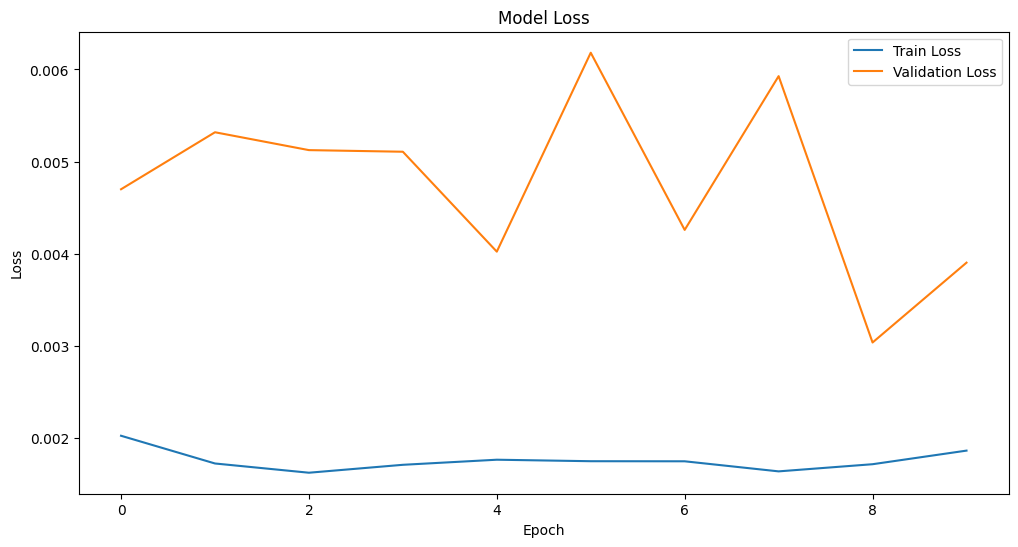

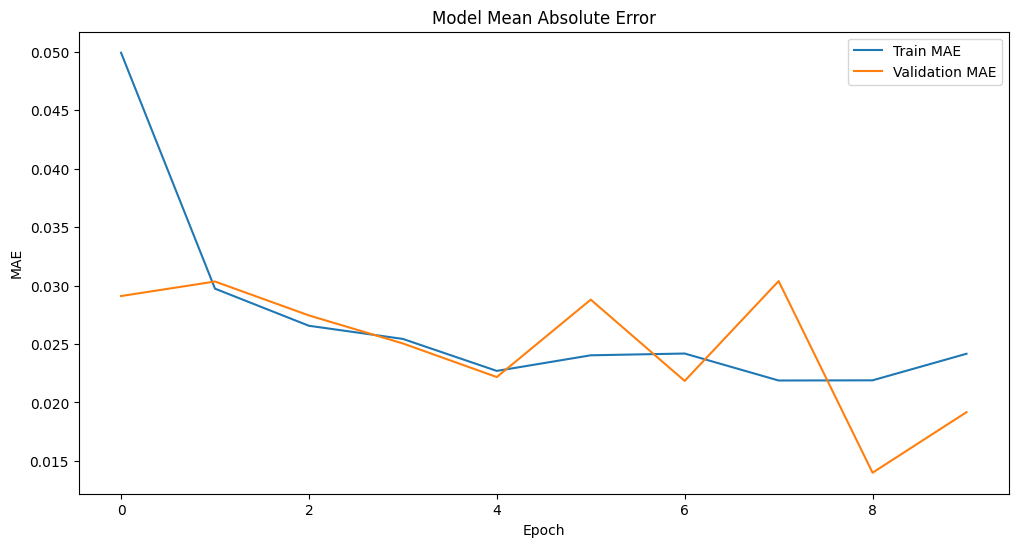

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.show()
# history.history

In [15]:
siamese_model.save("./data/siamese_model.keras")

#### Testing the difference

In [16]:
# import tensorflow as tf
# siamese_model = tf.keras.models.load_model("./data/siamese_model.keras")

# Make predictions on the testing set
predictions = siamese_model.predict([Encoding1_Test, Encoding2_Test])

# Print the predictions
print(predictions.shape)
print(AlignmentScore_Test.shape)

1364/1364 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step
(43619, 1)
(43619,)


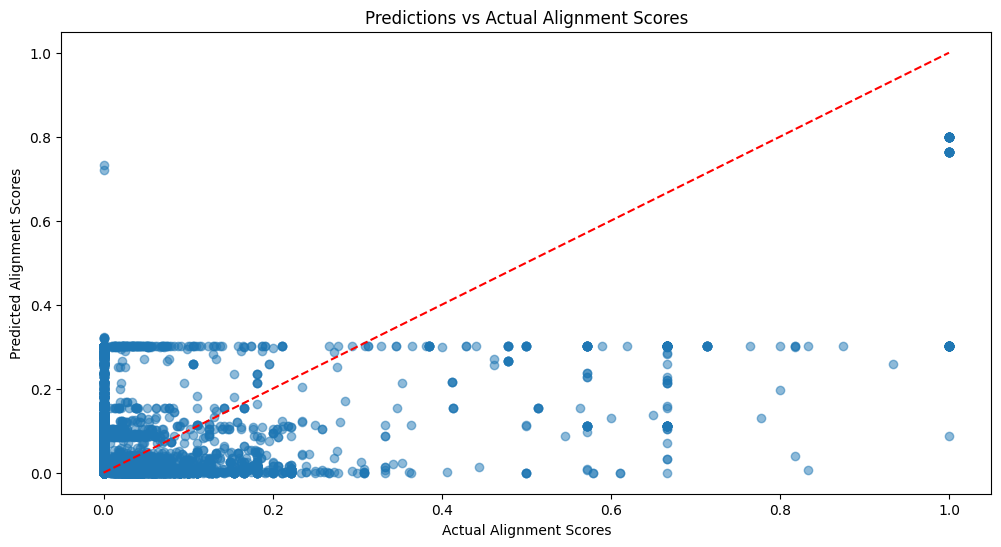

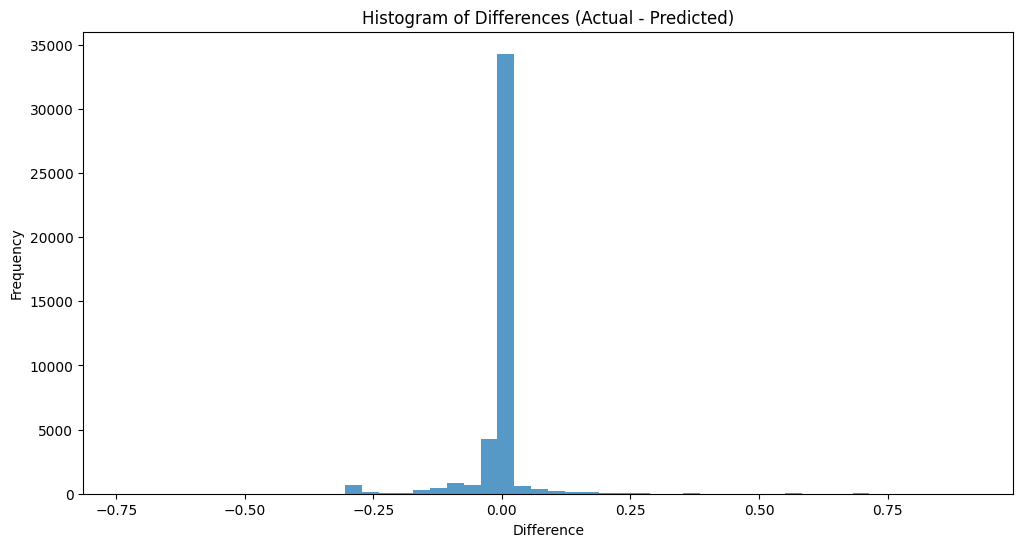

In [17]:
import matplotlib.pyplot as plt

# Scatter plot of predictions vs actual alignment scores
plt.figure(figsize=(12, 6))
plt.scatter(AlignmentScore_Test, predictions, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # Line for reference
plt.title('Predictions vs Actual Alignment Scores')
plt.xlabel('Actual Alignment Scores')
plt.ylabel('Predicted Alignment Scores')
plt.show()

# Histogram of the differences
differences = AlignmentScore_Test - predictions.flatten()
plt.figure(figsize=(12, 6))
plt.hist(differences, bins=50, alpha=0.75)
plt.title('Histogram of Differences (Actual - Predicted)')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

#### Evaluate the Model using Tensorflow

In [18]:
# Evaluate the model on the testing set
evaluation = siamese_model.evaluate([Encoding1_Test, Encoding2_Test], AlignmentScore_Test)

# Print the evaluation results
print(f"Test Loss: {evaluation[0]}")
print(f"Test MAE: {evaluation[1]}")

1364/1364 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - loss: 0.0022 - mae: 0.0134
Test Loss: 0.0037896819412708282
Test MAE: 0.019206129014492035
